# 4.1 K- Nearest Neighbors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from collections import Counter

In [ ]:
np.random.seed(666)
raw_data_x = np.random.random_sample(30).reshape(15,-1)*10
raw_data_y = np.random.randint(0,2,size = 15)

In [ ]:
X_train = raw_data_x
y_train = raw_data_y

In [ ]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color = 'g',marker ='o')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color = 'r',marker ='+')
plt.scatter(x[0],x[1],color = 'b',marker ='*')

In [ ]:
x = np.array([8.09,3.36])

## 1. KNN的过程

In [ ]:
distance = [sqrt(np.sum((x_train-x)**2)) for x_train in X_train]

In [ ]:
distance

In [ ]:
nearest = np.argsort(distance)
k = 6
topK_y = [y_train[i] for i in nearest[:6]]

In [ ]:
topK_y

In [ ]:
nearest

In [ ]:
votes = Counter(topK_y)

In [ ]:
votes.most_common()

In [ ]:
votes.most_common(1)

In [ ]:
votes .most_common(1)[0][0]

## 2. KNN的封装成函数

In [ ]:
%run kNN.py

In [ ]:
predict_y = KNN_classify(3,X_train,y_train,x)

In [ ]:
predict_y

## 3. 使用sklearn 中的KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
KNN_classifier.fit(X_train,y_train)

In [ ]:
KNN_classifier.predict(x.reshape(1,-1))## 预测的序列希望是矩阵

## 4. 重新整理KNN代码为Class 类，使之和sklearn是一样的

In [ ]:
%run kNN.py

In [ ]:
Knn_clf = KNNClassifier(k=3)

In [ ]:
Knn_clf.fit(X_train,y_train)

In [ ]:
Knn_clf.predict(x.reshape(1,-1))

## 5. 判断机械学习算法得到的性能

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data[:,:2]
y = iris.target

In [ ]:
X.shape
y.shape

### train \_test\_split

In [ ]:
y

In [ ]:
shuffle_indexes = np.random.permutation(len(X))

In [ ]:
shuffle_indexes

In [ ]:
test_ratio = 0.2
test_size = int(len(X)*test_ratio)

In [ ]:
test_size

In [ ]:
test_indexes = shuffle_indexes[:test_size]
train_inexes = shuffle_indexes[test_size:]

In [ ]:
X_train = X[train_inexes]
y_train = y[train_inexes]
X_test = X[test_indexes]
y_test = y[test_indexes]

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
from playML.model_selection import train_test_split 
from playML.KNN import KNNClassifier

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(X,y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
knn_clf = KNNClassifier(k =3)

In [ ]:
knn_clf.fit(X_train,y_train)

In [ ]:
y_predict = knn_clf.predict(X_test)

In [ ]:
y_predict

In [ ]:
y_test

In [ ]:
sum(y_predict ==y_test)/len(y_test)

In [ ]:
plt.scatter(X_test[y_predict==2,0],X_test[y_predict==2,1],color ='r',marker= 'o')
plt.scatter(X_test[y_test==2,0],X_test[y_test==2,1],color ='b',marker= '*')

In [ ]:
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],color ='r',marker= 'o')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],color ='b',marker= '*')
plt.scatter(X_test[y_test==2,0],X_test[y_test==2,1],color ='g',marker= '+')

In [ ]:
from sklearn.model_selection  import train_test_split

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =66)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### 6. 手写字体的识别

In [10]:
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()

In [11]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [12]:
X = digits.data

In [13]:
X.shape

(1797, 64)

In [14]:
y = digits.target

In [15]:
y.shape

(1797,)

In [16]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

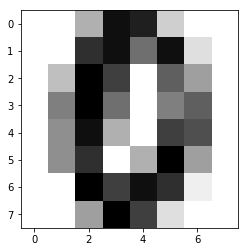

In [18]:
some_digit_image = X[666].reshape(8,8)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary) # 进行灰度显示

In [19]:
y[666]

0

In [20]:
from playML.model_selection import train_test_split
from playML.KNN import KNNClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_ratio = 0.2)
my_knn_clf = KNNClassifier(k =3)

In [21]:
my_knn_clf.fit(X_train,y_train)

KNN(k =3)

In [22]:
y_predict = my_knn_clf.predict(X_test)

In [23]:
sum(y_predict==y_test)/len(y_test)

0.9888579387186629

In [24]:
from playML.metrices import accracy_score

In [25]:
accracy_score(y_test,y_predict)

0.9888579387186629

In [29]:
my_knn_clf.score(X_test,y_test) ##直接求出X_test和 y_test 的结果进行比较

0.9888579387186629

## 7. scikit_sklearn 中的accracy_score

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 666)

In [38]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
y_predict = knn_clf.predict(X_test)

In [40]:
accracy_score(y_test,y_predict)

0.9888888888888889

In [42]:
knn_clf.score(X_test,y_test)

0.9888888888888889

## 8. 超参数.寻找最好的 k 值

In [52]:
best_method =''
best_p ='-1'
best_score = 0.0
best_k = -1
for k in range(1,11):
    for method in ['uniform','distance']:
        for k in range(1,11):
            knn_clf = KNeighborsClassifier(n_neighbors= k,weights=method,p = k)
            knn_clf.fit(X_train,y_train)
            score = knn_clf.score(X_test,y_test)
            if score > best_score:
                best_k= k
                best_score = score
                best_method = method
                best_p= k
print('best_k= ',best_k)
print('best_score= ',best_score)
print('best_method= ',best_method)
print('best_p= ',best_p)

best_k=  2
best_score=  0.9888888888888889
best_method=  uniform
best_p=  2


In [51]:
KNeighborsClassifier?

## 9. 网格搜索（grid Search）

In [78]:
param_grid = [
    {
    'weights':['uniform'],
    'n_neighbors':[ i for i in range(1,11)],     
    },
    {
    'weights':['distance'],
    'n_neighbors':[ i for i in range(1,11)],
    'p': [ i for i in range(1,6)]
    }
]

In [79]:
knn_clf = KNeighborsClassifier()

In [84]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid_search = GridSearchCV(knn_clf,param_grid,n_jobs = 2,verbose= 2) 
#n_jobs 用几个核进行计算 -1 代表全用上
#verbose 值越大输出的信息是越多的

In [98]:
%%time
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


f:\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    8.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  1.3min


Wall time: 1min 37s


[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  1.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [99]:
grid_search.best_estimator_ ##代码的原则，根据用户的输入，而产生的输出命名

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='distance')

In [100]:
grid_search.best_score_

0.9853862212943633

In [101]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [104]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_test,y_test)

0.9833333333333333

In [105]:
from sklearn.neighbors import DistanceMetric

In [106]:
DistanceMetric?

## 10. 数据的归一化

### 最值归一化

In [114]:
x = np.random.randint(0,100,100)

In [116]:
x = (x - x.min())/(x.max()-x.min())

In [127]:
X = np.random.randint(0,100,size = (50,2))
X = np.array(X,dtype = float)

In [128]:
X[:,0] = (X[:,0]-np.min(X[:,0]))/(np.max(X[:,0])-np.min(X[:,0]))
X[:,1] = (X[:,1]-np.min(X[:,1]))/(np.max(X[:,1])-np.min(X[:,1]))                                 

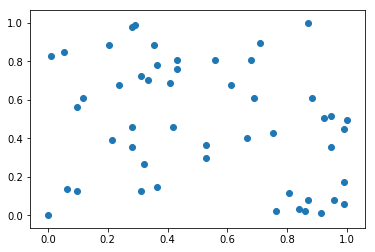

In [129]:
plt.scatter(X[:,0],X[:,1])

### 均值方差归一化

In [138]:
X2 = np.random.randint(0,100,size = (100,2))
X2 = np.array(X2,dtype = float)

In [142]:
X2[:,0] = (X2[:,0]-np.mean(X2[:,0]))/(np.std(X2[:,0]))
X2[:,1] = (X2[:,1]-np.mean(X2[:,1]))/(np.std(X2[:,1]))  

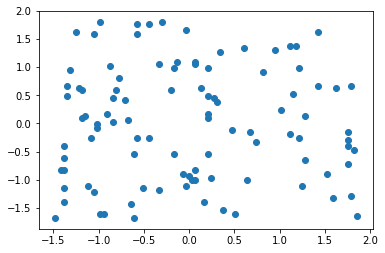

In [143]:
plt.scatter(X2[:,0],X2[:,1])

In [144]:
print(np.mean(X2[:,0]))
print(np.mean(X2[:,1]))
print(np.std(X2[:,0]))
print(np.std(X2[:,1]))

3.3306690738754695e-18
1.2406742300186124e-16
1.0
1.0


## 11. Scikit - learn 中的Scaler

In [151]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [149]:
iris = datasets.load_iris()

In [179]:
X = iris.data
y = iris.target

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 666)

### scikit -learn 中的Standard 的scaler

In [181]:
from sklearn.preprocessing import StandardScaler 

In [182]:
standarScaler  = StandardScaler()
standarScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [183]:
standarScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [184]:
standarScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [185]:
X_train_Standar = standarScaler.transform(X_train)

In [186]:
X_test_Standar = standarScaler.transform(X_test)

In [187]:
from sklearn.neighbors import KNeighborsClassifier

In [188]:
knn_clf = KNeighborsClassifier(n_neighbors= 3)
knn_clf = knn_clf.fit(X_train,y_train)

In [189]:
knn_clf.score(X_test_Standar,y_test)

0.26666666666666666

In [190]:
knn_clf.score(X_test,y_test)

1.0

In [263]:
from playML.preprocessing import StandarScaler

In [281]:
standarScaler = StandardScaler()
standarScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [282]:
standarScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [283]:
standarScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [287]:
X_train_Standar = standarScaler.transform(X_train)
X_test_Standar = standarScaler.transform(X_test)

In [286]:
knn_clf = KNeighborsClassifier(n_neighbors= 3)
knn_clf = knn_clf.fit(X_train_Standar,y_train)

In [288]:
knn_clf.score(X_test_Standar,y_test)

1.0